In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [61]:
def max_allowable_obstacle_width(max_accel_allowed, velocity_towards_obstacle, sensor_range=10.0):
    time_until_crash = sensor_range / velocity_towards_obstacle
    j_tf = 0.200 #jerk linear approximation time
    time_until_crash -= j_tf
    max_dodge_width = 1.0/2.0*max_accel_allowed*time_until_crash**2 + \
        3.0/2.0*max_accel_allowed*j_tf*time_until_crash + \
        2.0/3.0*max_accel_allowed*j_tf**2
    one_sigma = 0.01 + time_until_crash*(0.5 + 0.1*velocity_towards_obstacle)
    max_dodge_width -= one_sigma
    return 2*max_dodge_width

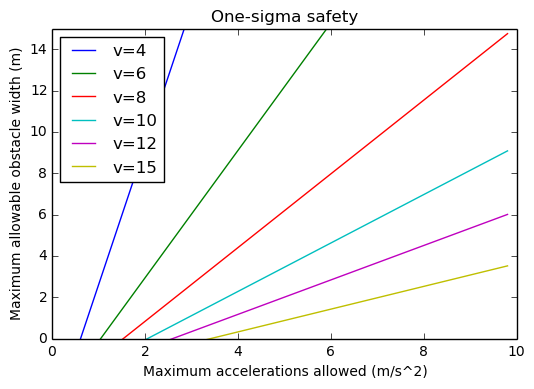

In [68]:
max_roll_allowed = np.linspace(0.0,45.0,100)
accelerations_allowed = max_roll_allowed*0.0
obstacle_widths_allowed = accelerations_allowed*0.0

for index, value in enumerate(max_roll_allowed):
    accelerations_allowed[index] = 9.8 * math.tan(value * np.pi / 180.0) 

    
def plot_for_velocity(velocity):
    for index, value in enumerate(accelerations_allowed):
        obstacle_widths_allowed[index] = max_allowable_obstacle_width(value, velocity)
    plt.plot(accelerations_allowed, obstacle_widths_allowed, label='v='+str(velocity))
    
velocities = [4, 6, 8, 10, 12, 15]

for i in velocities:
    plot_for_velocity(i)
    
plt.ylim(0,15)  
plt.title('One-sigma safety')
plt.legend(loc="upper left")
plt.xlabel('Maximum accelerations allowed (m/s^2)')
plt.ylabel('Maximum allowable obstacle width (m)')
plt.show() 

    

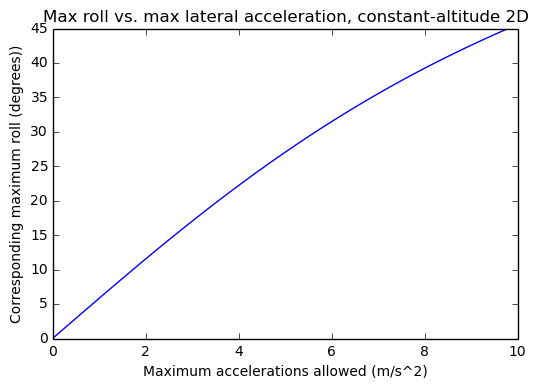

In [67]:
# Correlate maximum lateral accelerations with rolls
plt.plot(accelerations_allowed, max_roll_allowed)
plt.title('Max roll vs. max lateral acceleration, constant-altitude 2D')
plt.xlabel('Maximum accelerations allowed (m/s^2)')
plt.ylabel('Corresponding maximum roll (degrees))')
plt.show() 